# Лабораторная работа 5, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

Сделаем предобработку данных

In [13]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [14]:
# Инициализация и обучение модели градиентного бустинга
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter, y_train_shelter)

GradientBoostingClassifier()

Оценка качества модели

Accuracy: 0.76
F1 Score: 0.65
Recall: 0.55
Precision: 0.79


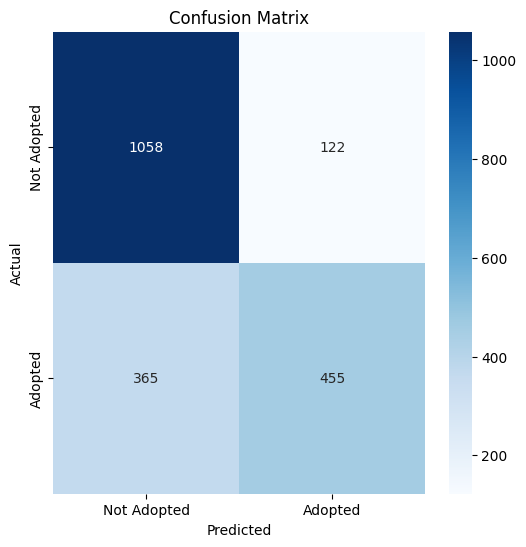

In [15]:
# Предсказание
y_pred_shelter = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_gradient = accuracy_score(y_test_shelter, y_pred_shelter)
f1_gradient = f1_score(y_test_shelter, y_pred_shelter)
recall_gradient = recall_score(y_test_shelter, y_pred_shelter)
precision_gradient = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_gradient:.2f}")
print(f"F1 Score: {f1_gradient:.2f}")
print(f"Recall: {recall_gradient:.2f}")
print(f"Precision: {precision_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [16]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [17]:
# Инициализация и обучение модели градиентного бустинга
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house, y_train_house)

GradientBoostingRegressor()

Оценка качества модели

In [18]:
# Предсказание
y_pred_house = gradient_reg.predict(X_test_house)

# Метрики качества
mae_gradient = mean_absolute_error(y_test_house, y_pred_house)
rmse_gradient = root_mean_squared_error(y_test_house, y_pred_house)
r2_gradient = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_gradient:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gradient:.2f}")
print(f"R^2 Score: {r2_gradient:.2f}")

Mean Absolute Error (MAE): 125193.25
Root Mean Squared Error (RMSE): 194050.41
R^2 Score: 0.75


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: масштабирование

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [19]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = gradient_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_gradient:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.76
F1 Score: 0.65
Recall: 0.55
Precision: 0.79

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: -0.00


2. Формирование новых признаков

In [20]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)
X_shelter = X_shelter.fillna(X_shelter.mean())

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = gradient_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_gradient:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74

Сравнение с бейзлайном:
Разница в Accuracy: 0.02
Разница в F1 Score: 0.06


3. Подбор гиперпараметров

In [ ]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров

# Слишком долго ждать, тестировал по одному:
# {'n_estimators': 200}
# {'learning_rate': 0.1}
# {'max_depth': 5}

param_grid = {
    # 'n_estimators': [100, 150, 200],
    # 'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_gradient_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_gradient_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_gradient:.2f}")

Лучшие параметры: {'max_depth': 5}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74

Сравнение с бейзлайном:
Разница в Accuracy: 0.02
Разница в F1 Score: 0.06


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [30]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение модели случайного леса
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = gradient_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_gradient:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 125047.28
Root Mean Squared Error (RMSE): 193387.68
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -145.96
Разница в RMSE: -662.74
Разница в R^2: 0.00


2. Формирование новых признаков

In [31]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели случайного леса
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = gradient_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_gradient:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 125320.72
Root Mean Squared Error (RMSE): 196049.49
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: 127.47
Разница в RMSE: 1999.08
Разница в R^2: -0.01


3. Подбор гиперпараметров

In [34]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

# Лучшие параметры и их оценка
best_gradient_reg = grid_search.best_estimator_
best_score = -grid_search.best_score_  # Инвертируем, так как использовался отрицательный MAE

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация (MAE): {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_house_gs = best_gradient_reg.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_gs - r2_gradient:.2f}")

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Лучшая кросс-валидация (MAE): -0.69

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 123666.57
Root Mean Squared Error (RMSE): 191298.04
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -1526.67
Разница в RMSE: -2752.37
Разница в R^2: 0.01


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200 }, а также новый признак: AgeInDays и IsDog


В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Классификация

In [36]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

gradient_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)

Регрессия

In [37]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

gradient_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [38]:
gradient_clf.fit(X_train_shelter, y_train_shelter)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

Регрессия

In [39]:
gradient_reg.fit(X_train_house, y_train_house)

GradientBoostingRegressor(max_depth=5, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [40]:
# Предсказание
y_pred_shelter_best = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_gradient = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_gradient = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_gradient = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_gradient = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_gradient:.2f}")
print(f"F1 Score: {f1_best_gradient:.2f}")
print(f"Recall: {recall_best_gradient:.2f}")
print(f"Precision: {precision_best_gradient:.2f}")

Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74


Регрессия

In [43]:
# Предсказание
y_pred_house_best = gradient_reg.predict(X_test_house)

# Метрики качества
mae_best_gradient = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_gradient = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_gradient = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_gradient}")
print(f"R-squared (R^2): {r2_best_gradient}")

Mean Absolute Error (MAE): 125143.4468118789
Root Mean Squared Error (RMSE): 197023.59300145047
R-squared (R^2): 0.7382380568955619


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [44]:
print(f"Разница в accuracy: {accuracy_best_gradient - accuracy_gradient}")
print(f"Разница в F1 Score: {f1_best_gradient - f1_gradient}")

Разница в accuracy: 0.01200000000000001
Разница в F1 Score: 0.05538059253906513


Регрессия

In [45]:
print(f"Разница в MAE: {mae_best_gradient - mae_gradient}")
print(f"Разница в RMSE: {rmse_best_gradient - rmse_gradient}")
print(f"Разница в R^2: {r2_best_gradient - r2_gradient}")

Разница в MAE: -49.80056153952319
Разница в RMSE: 2973.1781874298467
Разница в R^2: -0.007840611340650505


### g. Выводы

**Вывод по классификации:**

Улучшения повысили точность и F1

**Вывод по регрессии:**

Улучшения понизили MAE, но повысили RMSE, а также незначительно понизили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация градиентного бустинга для классификации

In [64]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


class GradientBoostingClassifierCustom:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        """
        Инициализация классификатора градиентного бустинга.
        
        :param learning_rate: скорость обучения (шаг бустинга).
        :param max_depth: максимальная глубина базовых деревьев.
        :param n_estimators: количество базовых моделей.
        """
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.classes_ = None

    def fit(self, X, y):
        """
        Обучение классификатора.
        
        :param X: обучающие признаки (матрица NxM).
        :param y: обучающие метки классов (вектор длины N).
        """
        self.classes_ = np.unique(y)
        y_encoded = np.zeros((len(y), len(self.classes_)))

        # One-hot encoding меток классов
        for idx, cls in enumerate(self.classes_):
            y_encoded[:, idx] = (y == cls).astype(int)

        # Построение базовых моделей для каждого класса
        self.trees = [[] for _ in range(len(self.classes_))]
        predictions = np.zeros_like(y_encoded, dtype=float)

        for _ in range(self.n_estimators):
            for cls_idx in range(len(self.classes_)):
                residual = y_encoded[:, cls_idx] - predictions[:, cls_idx]
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
                tree.fit(X, residual)
                update = self.learning_rate * tree.predict(X)

                self.trees[cls_idx].append(tree)
                predictions[:, cls_idx] += update

    def predict(self, X):
        """
        Предсказание меток классов.
        
        :param X: тестовые признаки (матрица LxM).
        :return: предсказанные метки классов.
        """
        predictions = np.zeros((X.shape[0], len(self.classes_)))

        for cls_idx in range(len(self.classes_)):
            for tree in self.trees[cls_idx]:
                predictions[:, cls_idx] += self.learning_rate * tree.predict(X)

        return self.classes_[np.argmax(predictions, axis=1)]

Имплементация градиентного бустинга для регрессии

In [66]:
class GradientBoostingRegressorCustom:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        """
        Инициализация регрессора градиентного бустинга.
        
        :param learning_rate: скорость обучения (шаг бустинга).
        :param max_depth: максимальная глубина базовых деревьев.
        :param n_estimators: количество базовых моделей.
        """
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.initial_prediction = 0

    def fit(self, X, y):
        """
        Обучение регрессора.
        
        :param X: обучающие признаки (матрица NxM).
        :param y: обучающие целевые значения (вектор длины N).
        """
        self.initial_prediction = np.mean(y)
        predictions = np.full_like(y, self.initial_prediction, dtype=float)

        for _ in range(self.n_estimators):
            residual = y - predictions
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            update = self.learning_rate * tree.predict(X)

            self.trees.append(tree)
            predictions += update

    def predict(self, X):
        """
        Предсказание целевых значений.
        
        :param X: тестовые признаки (матрица LxM).
        :return: предсказанные целевые значения.
        """
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=float)

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions

### b. Обучение имплементированной модели

Классификация

In [67]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

gradient_clf = GradientBoostingClassifierCustom()
gradient_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [68]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

gradient_reg = GradientBoostingRegressorCustom()
gradient_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.76
F1 Score: 0.64
Recall: 0.54
Precision: 0.80


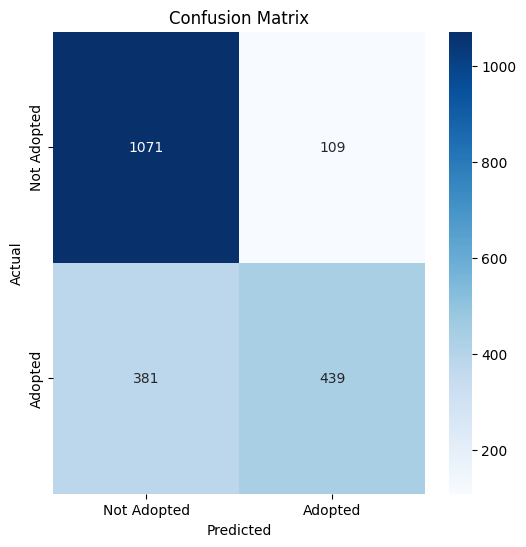

In [69]:
# Предсказание
y_pred_shelter = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_gradient = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_gradient = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_gradient = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_gradient = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_gradient:.2f}")
print(f"F1 Score: {f1_custom_gradient:.2f}")
print(f"Recall: {recall_custom_gradient:.2f}")
print(f"Precision: {precision_custom_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [70]:
# Предсказание
y_pred_house = gradient_reg.predict(X_test_house)

# Метрики качества
mae_custom_gradient = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_gradient = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_gradient = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_gradient}")
print(f"R-squared (R^2): {r2_custom_gradient}")

Mean Absolute Error (MAE): 125154.62491358255
Root Mean Squared Error (RMSE): 194586.52192680302
R-squared (R^2): 0.7446737026716812


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [71]:
print(f"Разница в accuracy: {accuracy_custom_gradient - accuracy_gradient}")
print(f"Разница в F1 Score: {f1_custom_gradient - f1_gradient}")

Разница в accuracy: -0.0014999999999999458
Разница в F1 Score: -0.009582982749165914


Регрессия

In [72]:
print(f"Разница в MAE: {mae_custom_gradient - mae_gradient}")
print(f"Разница в RMSE: {rmse_custom_gradient - rmse_gradient}")
print(f"Разница в R^2: {r2_custom_gradient - r2_gradient}")

Разница в MAE: -38.62245983586763
Разница в RMSE: 536.1071127823961
Разница в R^2: -0.0014049655645311798


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась незначительно хуже, чем для встроенной модели

В случае с линейной регрессией, MAE уменьшилась, RMSE увеличилась, а R^2 стал немного ниже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [73]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

gradient_clf = GradientBoostingClassifierCustom(learning_rate=0.1, max_depth=5, n_estimators=200)

Регрессия

In [74]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

gradient_reg = GradientBoostingRegressorCustom(learning_rate=0.1, max_depth=5, n_estimators=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [75]:
gradient_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [76]:
gradient_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74


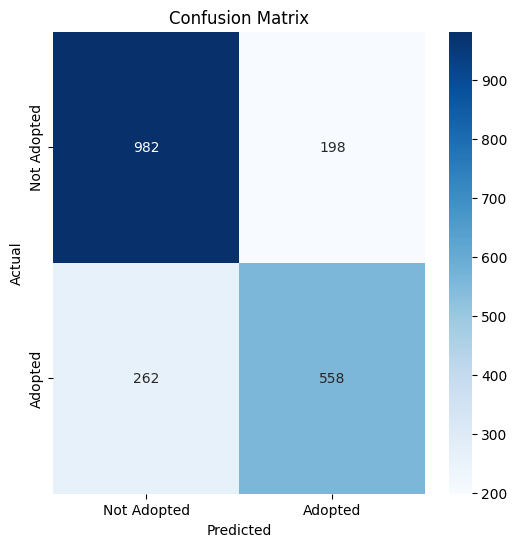

In [77]:
# Предсказание
y_pred_shelter_best = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_gradient = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_gradient = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_gradient = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_gradient = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_gradient:.2f}")
print(f"F1 Score: {f1_custom_best_gradient:.2f}")
print(f"Recall: {recall_custom_best_gradient:.2f}")
print(f"Precision: {precision_custom_best_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [78]:
# Предсказание
y_pred_house_best = gradient_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_gradient = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_gradient = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_gradient = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_gradient}")
print(f"R-squared (R^2): {r2_custom_best_gradient}")

Mean Absolute Error (MAE): 125149.64284513373
Root Mean Squared Error (RMSE): 196281.00230436344
R-squared (R^2): 0.7402075232286844


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [79]:
print(f"Разница в accuracy: {accuracy_custom_best_gradient - accuracy_best_gradient}")
print(f"Разница в F1 Score: {f1_custom_best_gradient - f1_best_gradient}")

Разница в accuracy: 0.0015000000000000568
Разница в F1 Score: 0.0013453866258603675


Регрессия

In [80]:
print(f"Разница в MAE: {mae_custom_best_gradient - mae_best_gradient}")
print(f"Разница в RMSE: {rmse_custom_best_gradient - rmse_best_gradient}")
print(f"Разница в R^2: {r2_custom_best_gradient - r2_best_gradient}")

Разница в MAE: 6.19603325483331
Разница в RMSE: -742.5906970870274
Разница в R^2: 0.0019694663331225604


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась лучше встроенной модели

В имплементированной модели с улучшениями MAE незначительно уменьшилась, RMSE уменьшилась, R^2 увеличился